# Résultats

## Chargement et préparation des données

In [1]:
# Importation des librairies
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [2]:
# Chargement des fichiers
file_paths = [
    "CNN_results.pkl",
    "LSTM_results.pkl",
    "RandomForest_results.pkl",
    "RidgeRegression_results.pkl",
    "RNN_results.pkl",
    "XGBoost_results.pkl"
]

results = {}
for file_path in file_paths:
    model_name = os.path.basename(file_path).replace("_results.pkl", "")
    with open('Data_to_share/'+file_path, 'rb') as file:
        results[model_name] = pickle.load(file)

In [3]:
# Création du DataFrame
all_metrics = ["mse", "mae", "mape", "rmse", "best_fold", "mean_mse", "mean_mae", "mean_mape", "mean_rmse"]
data = []

for model_name, model_results in results.items():
    row = {"model_name": model_name}
    for metric in all_metrics:
        row[metric] = model_results.get(metric, None)
    data.append(row)

df_results = pd.DataFrame(data)

## Visualisations

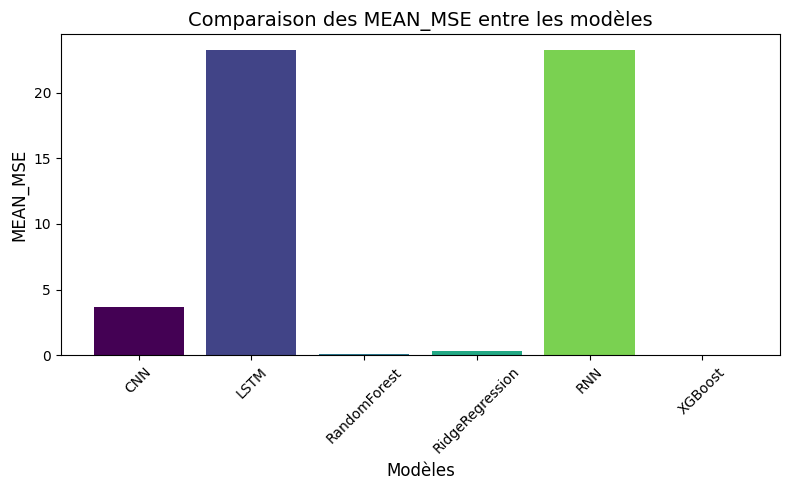

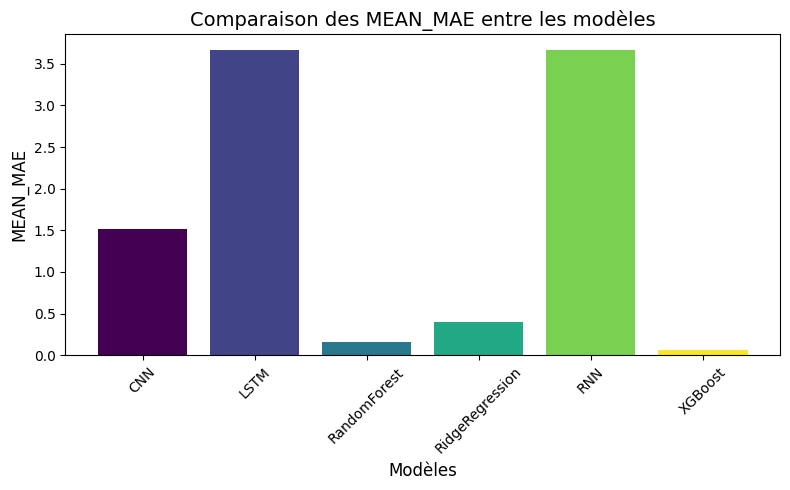

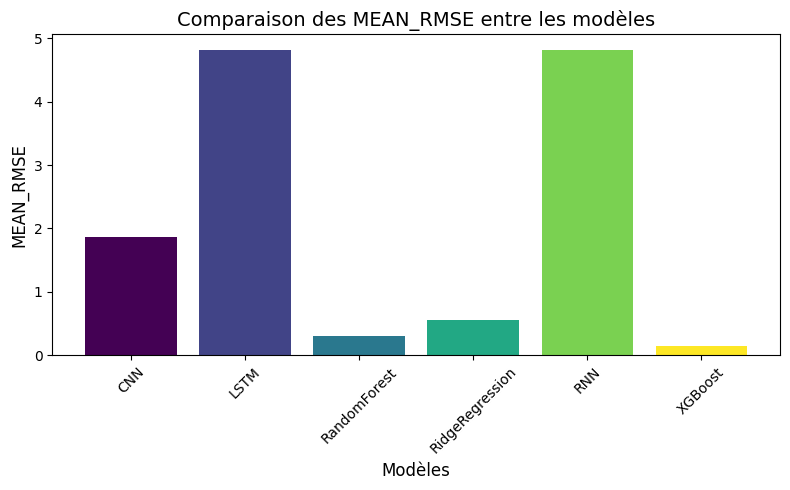

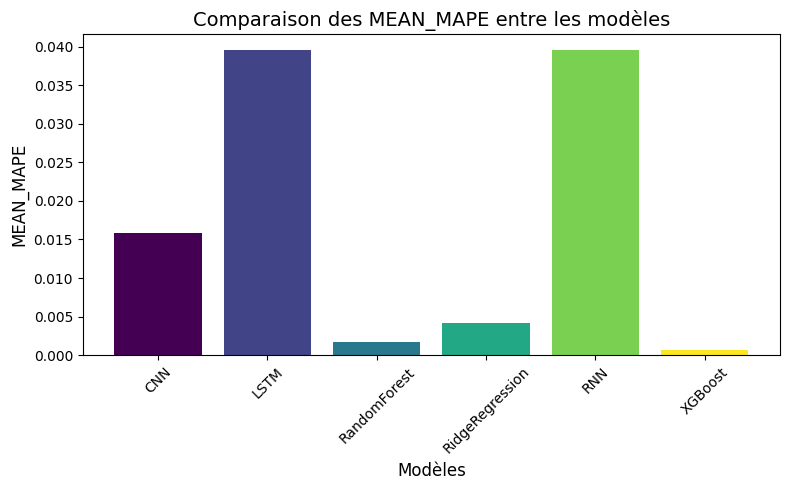

In [6]:
# Histogramme des erreurs moyennes des modèles
metrics_mean = ["mean_mse", "mean_mae", "mean_rmse", "mean_mape"]
x_labels = df_results["model_name"].values
x = np.arange(len(x_labels))

for metric in metrics_mean:
    y_values = df_results[metric].values
    plt.figure(figsize=(8, 5))
    plt.bar(x, y_values, color=plt.cm.viridis(np.linspace(0, 1, len(x))))
    plt.title(f"Comparaison des {metric.upper()} entre les modèles", fontsize=14)
    plt.xlabel("Modèles", fontsize=12)
    plt.ylabel(metric.upper(), fontsize=12)
    plt.xticks(x, x_labels, rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

Les moyennes MSE, MAE, RMSE et MAPE sont beaucoup plus élevée pour les modèles LSTM, RNN et CNN par rapport aux autres modèles. 

Nous les excluons des visualisations pour mieux analyser les performances des autres modèles.

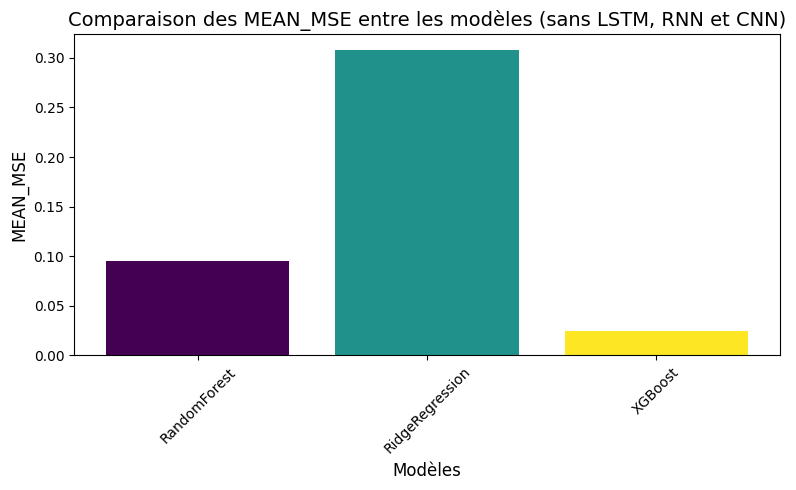

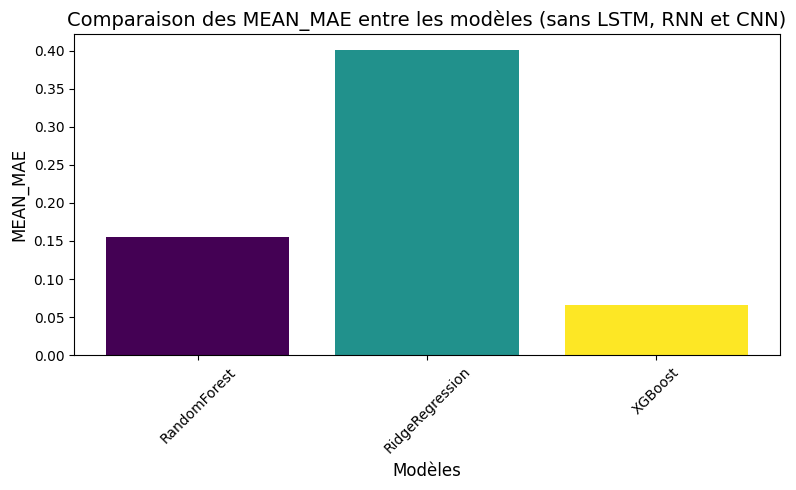

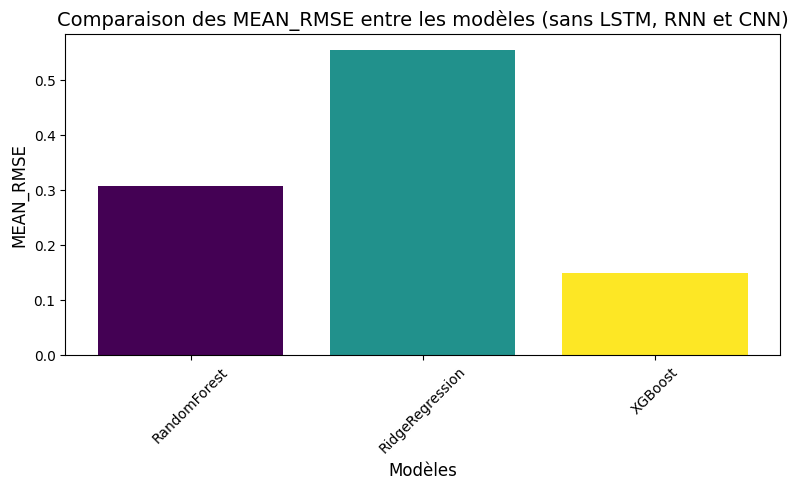

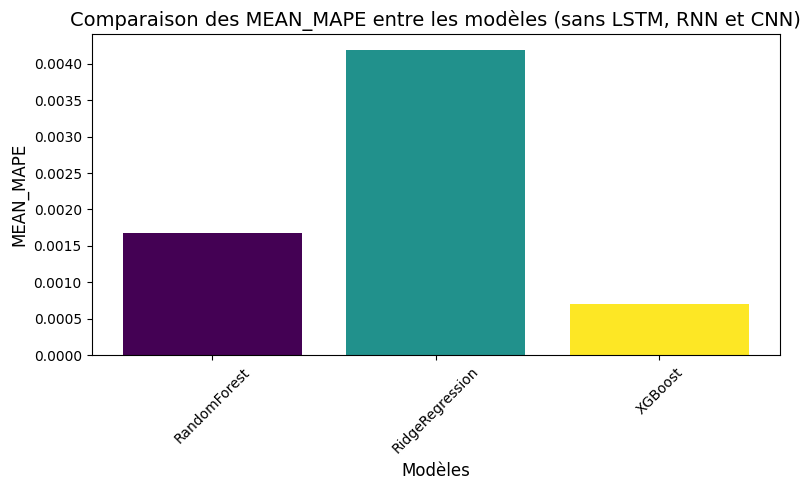

In [7]:
# Histogramme des erreurs moyennes des modèles sans LSTM et RNN
excluded_models = ["LSTM", "RNN", "CNN"]
filtered_df = df_results[~df_results["model_name"].isin(excluded_models)]
x_labels = filtered_df["model_name"].values
x = np.arange(len(x_labels))

for metric in metrics_mean:
    y_values = filtered_df[metric].values
    plt.figure(figsize=(8, 5))
    plt.bar(x, y_values, color=plt.cm.viridis(np.linspace(0, 1, len(x))))
    plt.title(f"Comparaison des {metric.upper()} entre les modèles (sans LSTM, RNN et CNN)", fontsize=14)
    plt.xlabel("Modèles", fontsize=12)
    plt.ylabel(metric.upper(), fontsize=12)
    plt.xticks(x, x_labels, rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

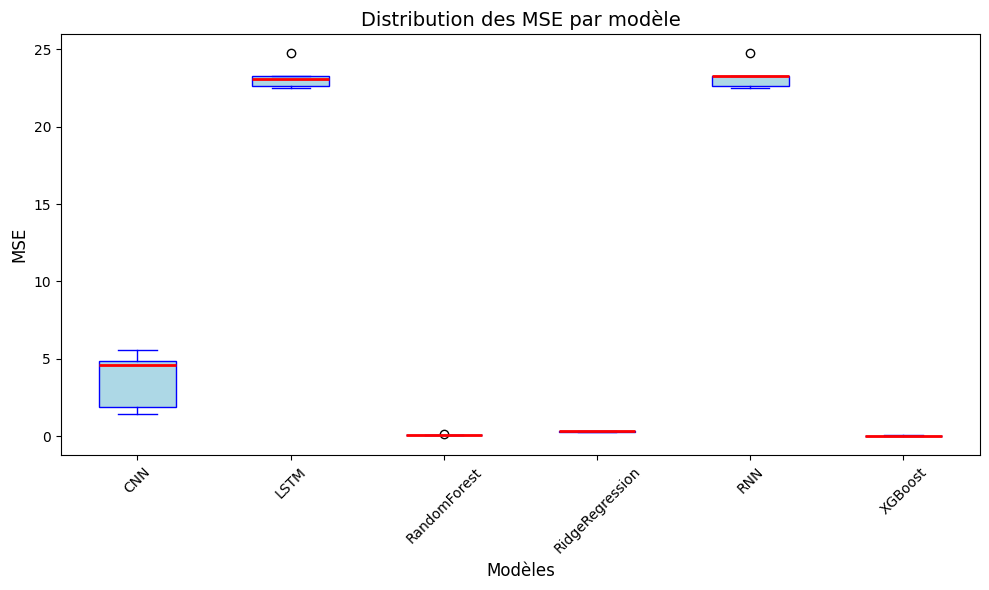

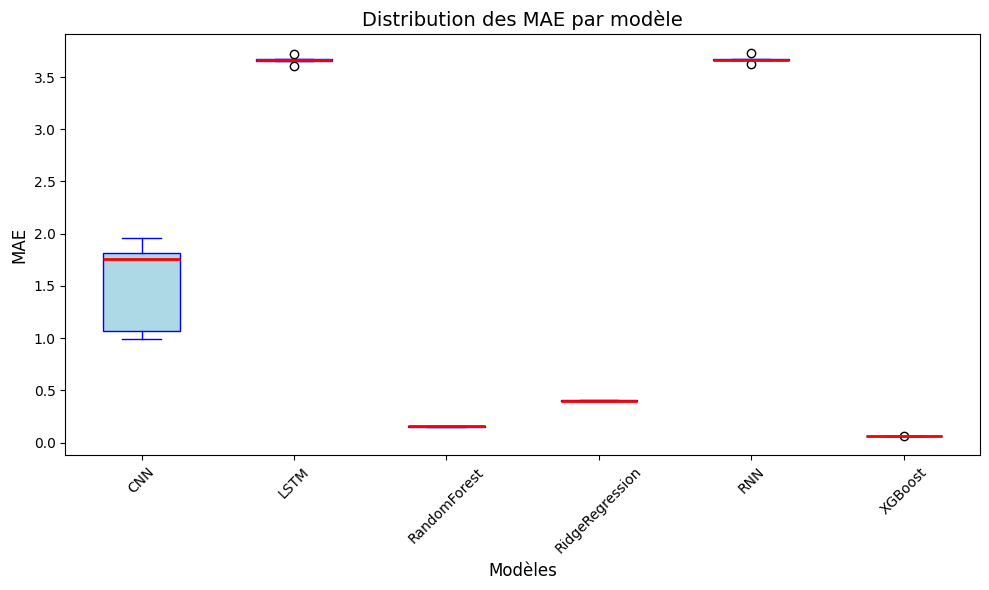

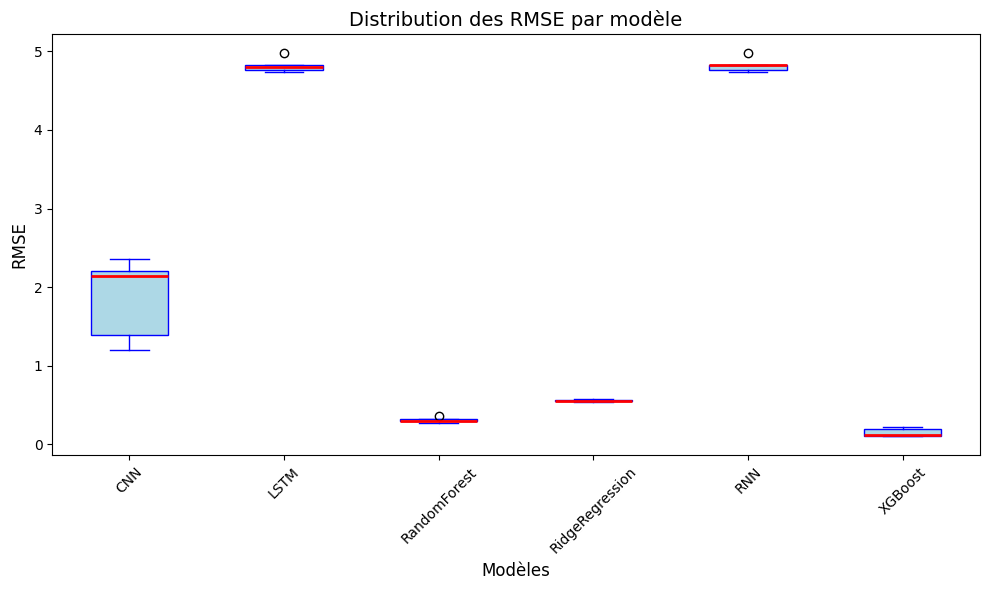

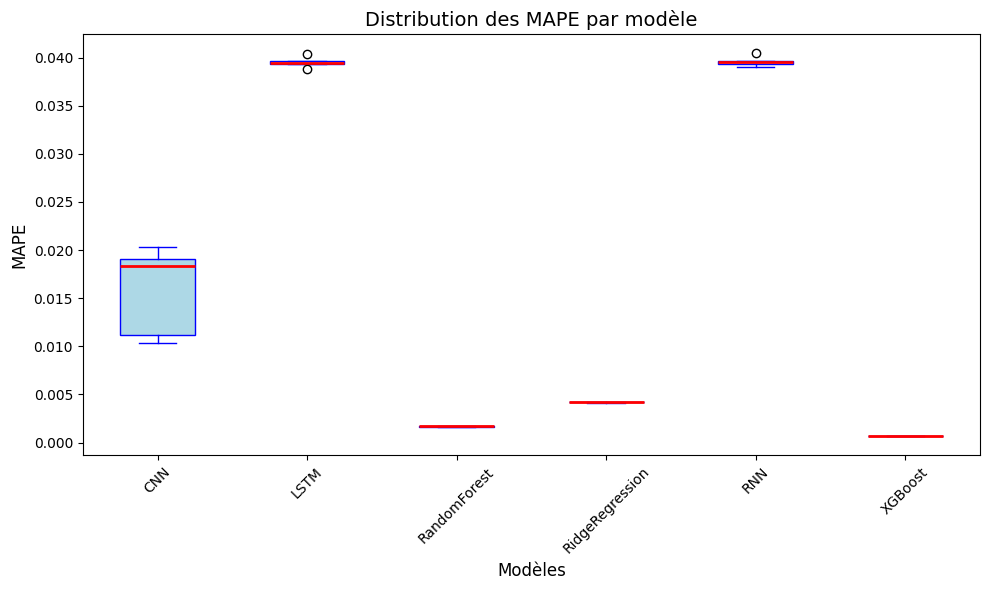

In [8]:
# Boxplots des erreurs des modèles
error_metrics = ["mse", "mae", "rmse", "mape"]

for metric in error_metrics:
    data_to_plot = [results[model][metric] for model in results if metric in results[model]]
    model_names = [model for model in results if metric in results[model]]

    plt.figure(figsize=(10, 6))
    plt.boxplot(data_to_plot, patch_artist=True,
                boxprops=dict(facecolor="lightblue", color="blue"),
                medianprops=dict(color="red", linewidth=2),
                whiskerprops=dict(color="blue"),
                capprops=dict(color="blue"))

    plt.title(f"Distribution des {metric.upper()} par modèle", fontsize=14)
    plt.xlabel("Modèles", fontsize=12)
    plt.ylabel(metric.upper(), fontsize=12)
    plt.xticks(ticks=range(1, len(model_names) + 1), labels=model_names, rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

Pour les mêmes raisons que les histogrammes précédents, nous réaffichons les boxplots sans les modèles LSTM, RNN et CNN.

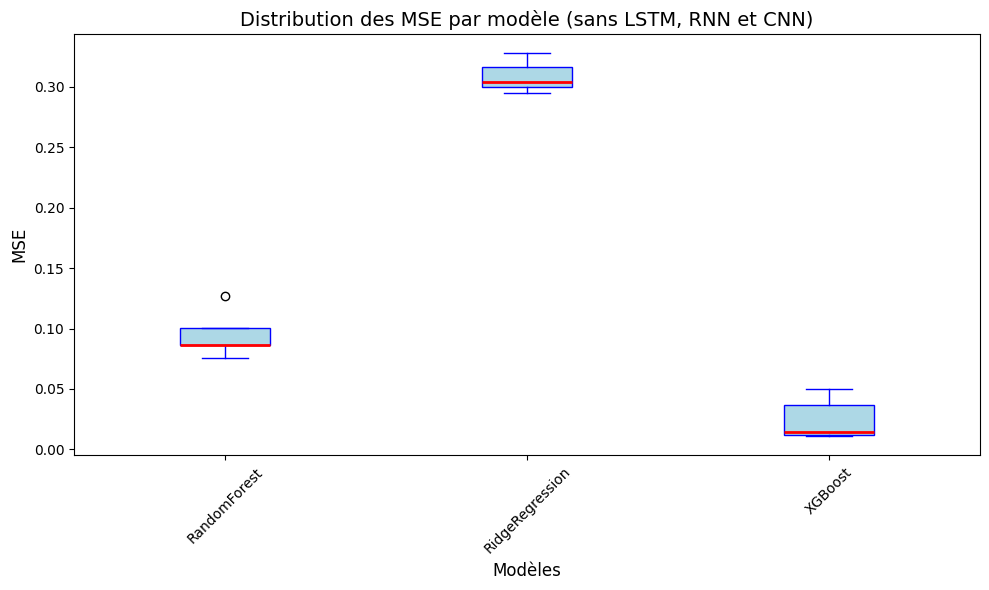

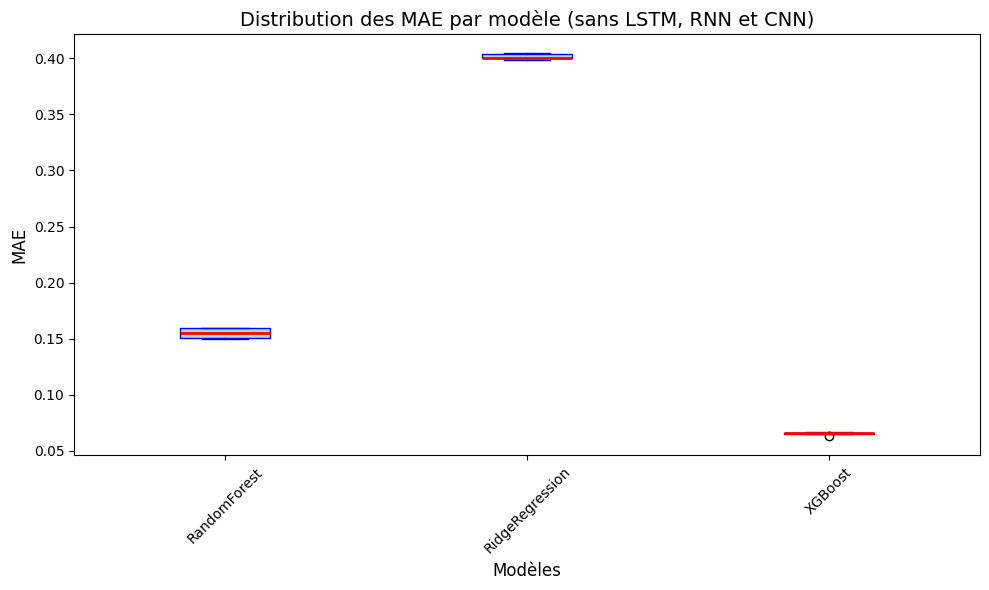

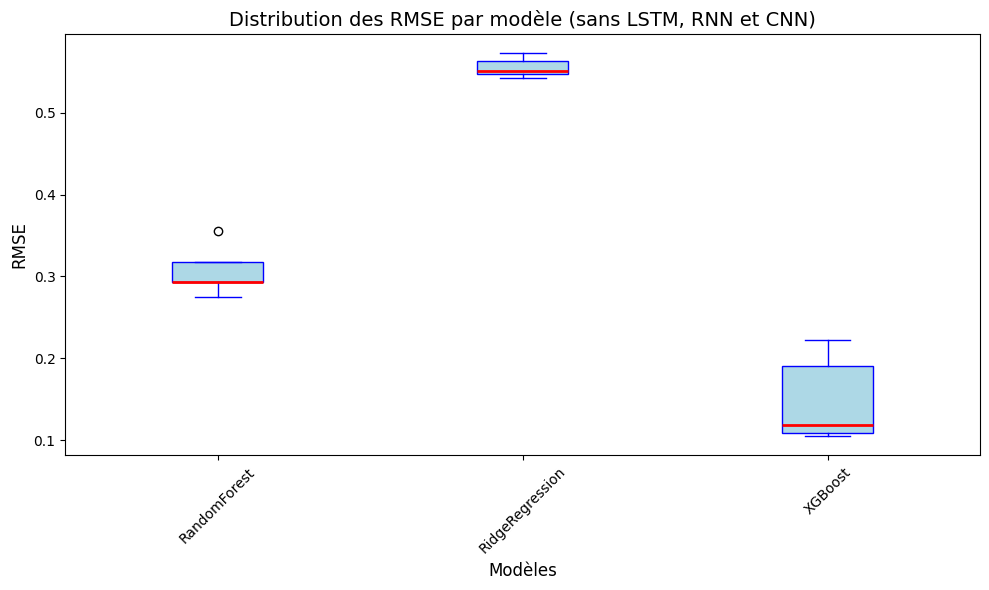

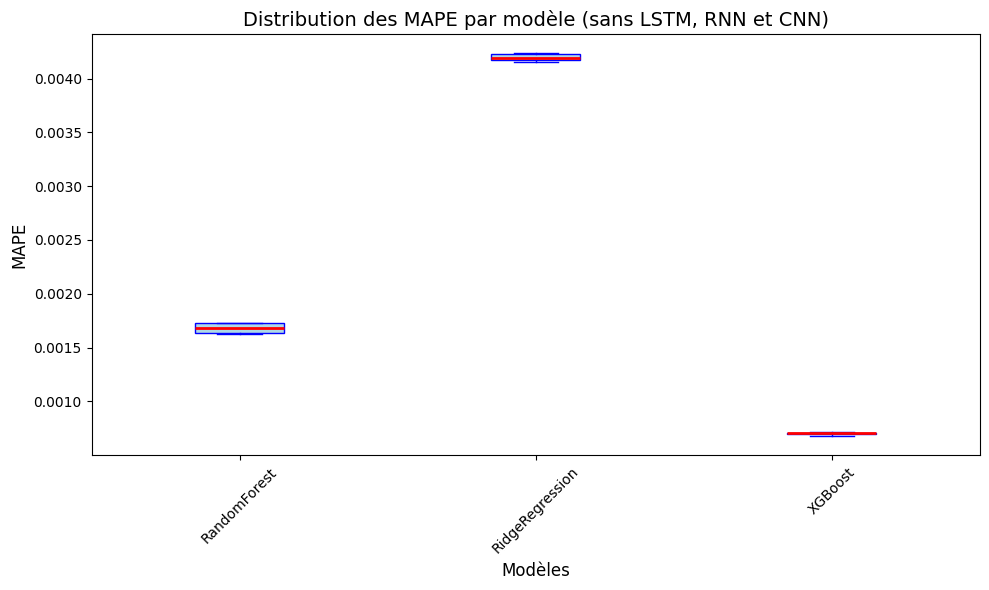

In [9]:
# Boxplots des erreurs des modèles (sans LSTM et RNN)
for metric in error_metrics:
    data_to_plot = [results[model][metric] for model in results if metric in results[model] and model not in excluded_models]
    model_names = [model for model in results if metric in results[model] and model not in excluded_models]

    plt.figure(figsize=(10, 6))
    plt.boxplot(data_to_plot, patch_artist=True,
                boxprops=dict(facecolor="lightblue", color="blue"),
                medianprops=dict(color="red", linewidth=2),
                whiskerprops=dict(color="blue"),
                capprops=dict(color="blue"))

    plt.title(f"Distribution des {metric.upper()} par modèle (sans LSTM, RNN et CNN)", fontsize=14)
    plt.xlabel("Modèles", fontsize=12)
    plt.ylabel(metric.upper(), fontsize=12)
    plt.xticks(ticks=range(1, len(model_names) + 1), labels=model_names, rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

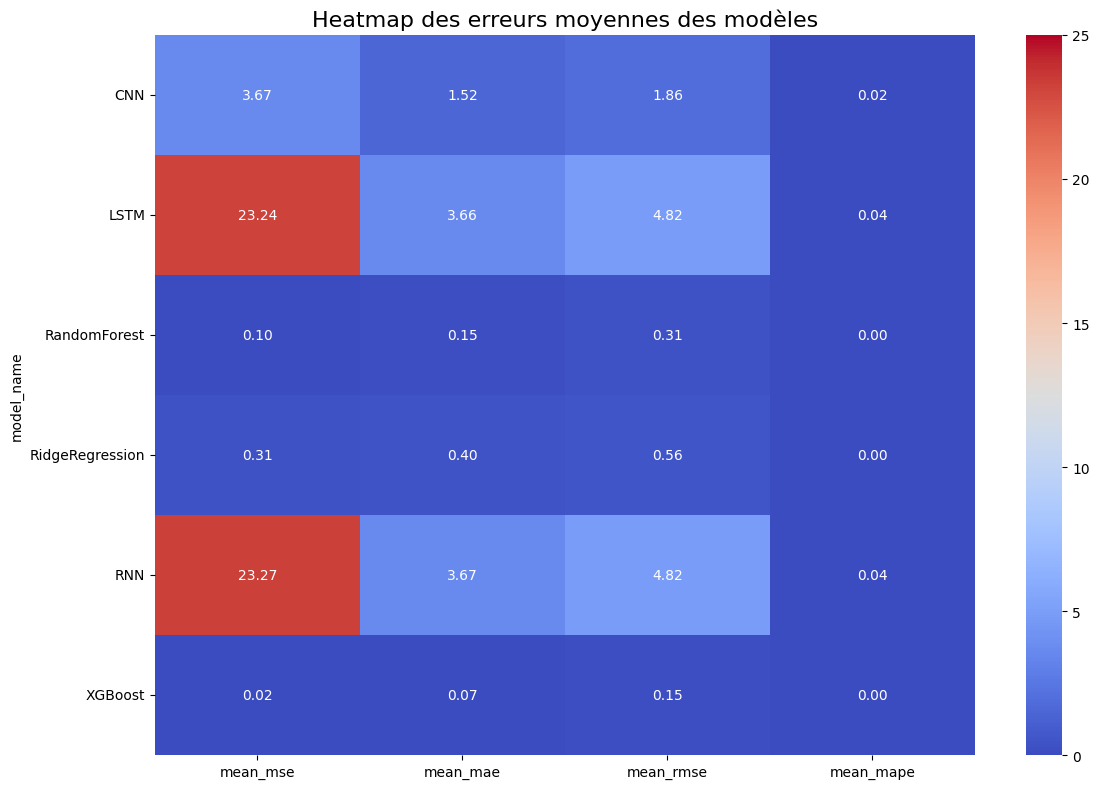

In [10]:
# Heatmap des erreurs moyennes des modèles
plt.figure(figsize=(12, 8))
heatmap_data = df_results.set_index("model_name")[metrics_mean].astype(float)
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, vmin=0, vmax=25)
plt.title("Heatmap des erreurs moyennes des modèles", fontsize=16)
plt.tight_layout()
plt.show()

Nous affichons la heatmap sans LSTM et RNN pour mieux comparer.

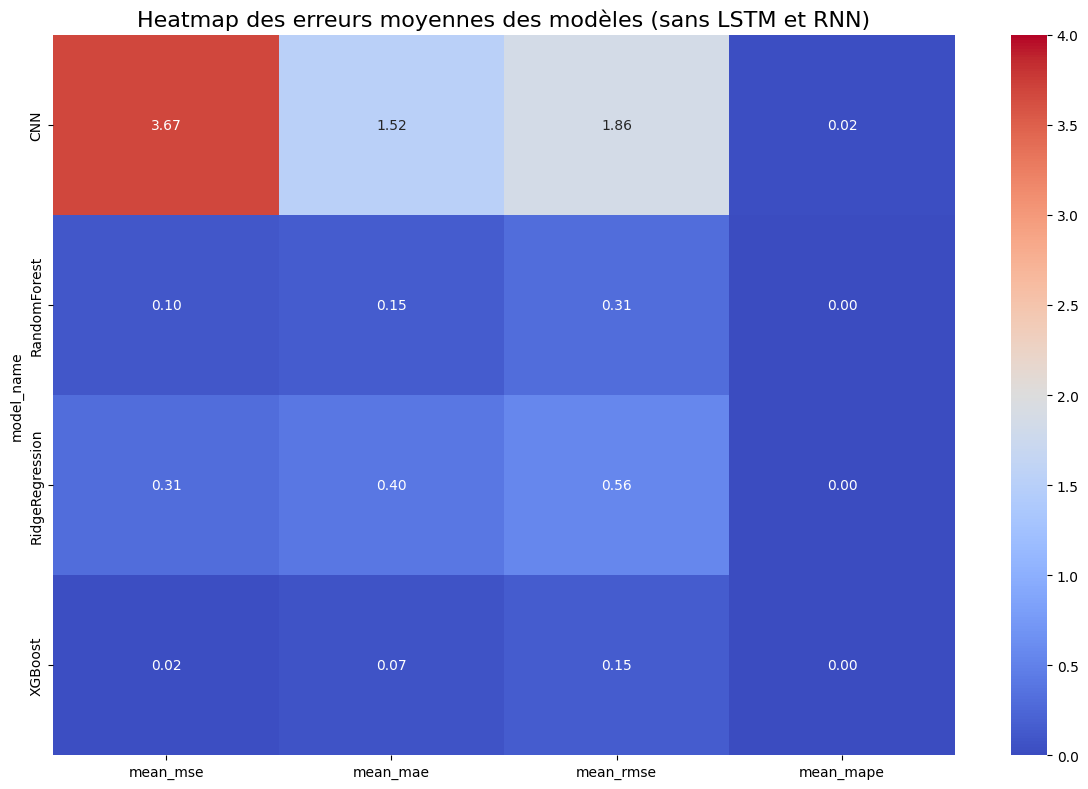

In [11]:
# Heatmap des erreurs moyennes des modèles sans LSTM et RNN
excluded_models_2 = ["LSTM", "RNN"]
filtered_heatmap_data = df_results[~df_results["model_name"].isin(excluded_models_2)].set_index("model_name")[metrics_mean].astype(float)

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, vmin=0, vmax=4)
plt.title("Heatmap des erreurs moyennes des modèles (sans LSTM et RNN)", fontsize=16)
plt.tight_layout()
plt.show()

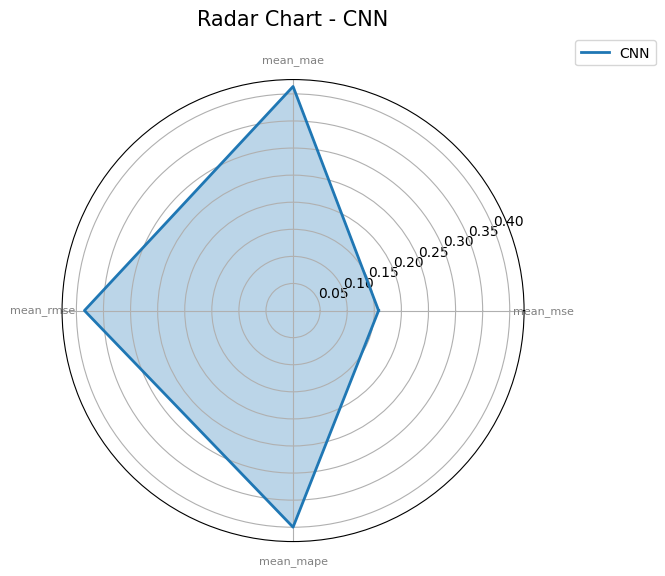

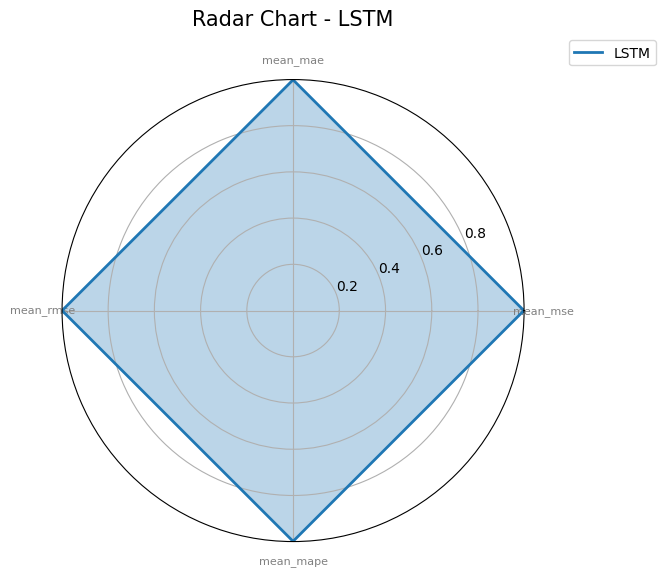

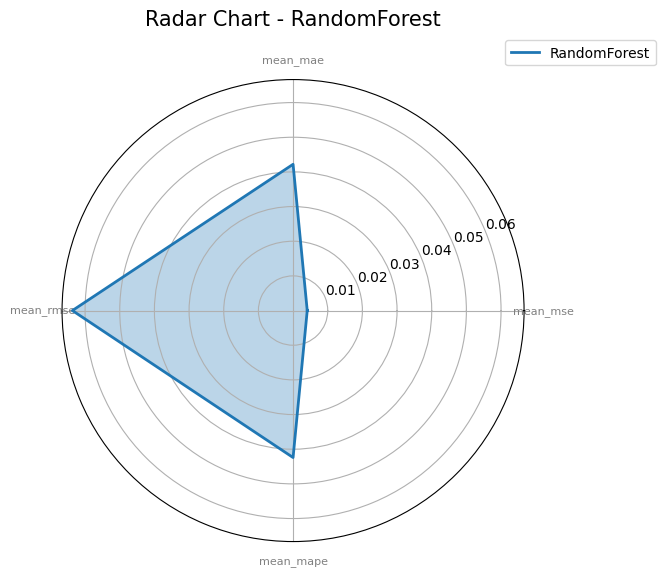

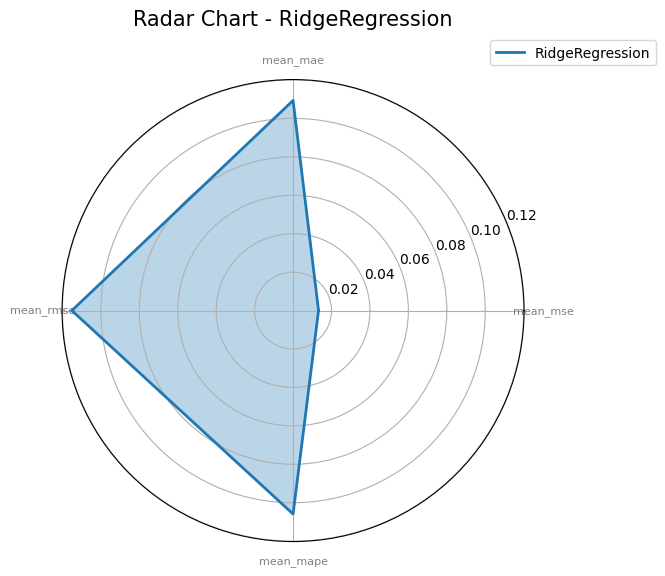

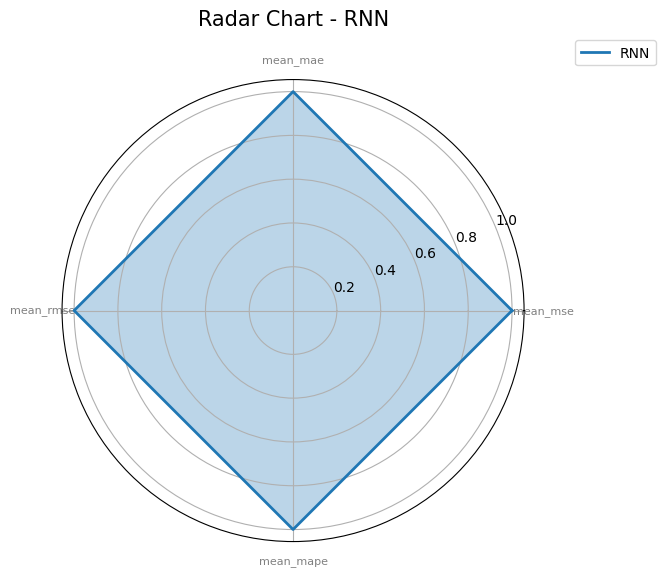

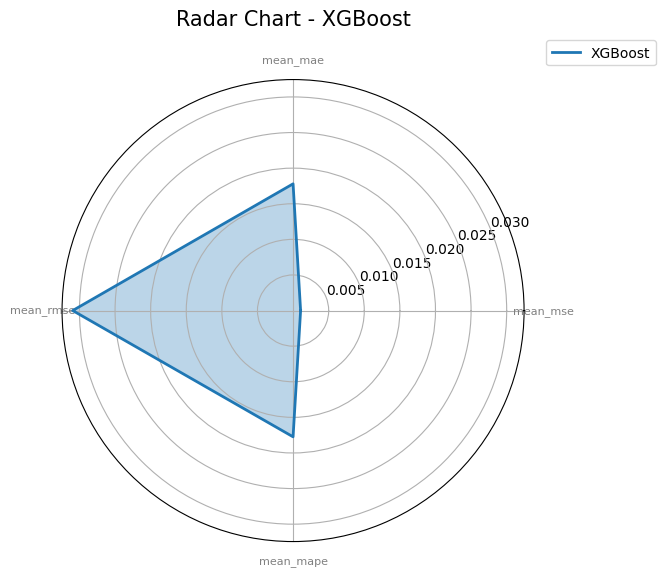

In [12]:
# Radar chart des erreurs moyennes des modèles
normalized_data = df_results[metrics_mean].div(df_results[metrics_mean].max(), axis=1)

categories = metrics_mean
N = len(categories)

for i, row in normalized_data.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color="grey", size=8)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_results["model_name"].iloc[i])
    ax.fill(angles, values, alpha=0.3)
    plt.title(f"Radar Chart - {df_results['model_name'].iloc[i]}", size=15, y=1.1)
    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
    plt.show()

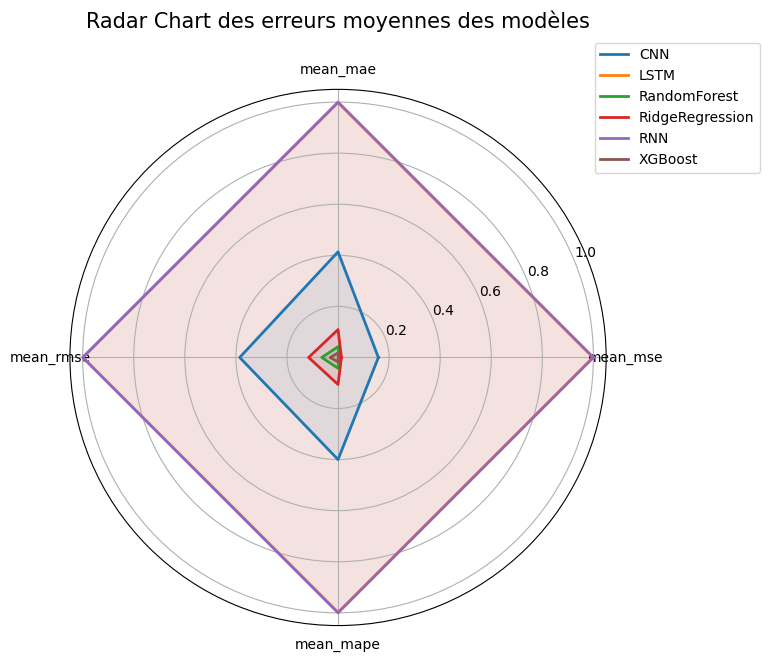

In [13]:
# Radar chart des erreurs moyennes des modèles regroupés
normalized_data = df_results[metrics_mean].div(df_results[metrics_mean].max(), axis=1)

categories = metrics_mean
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
for i, row in normalized_data.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_results["model_name"].iloc[i])
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories, color="black", size=10)
plt.title("Radar Chart des erreurs moyennes des modèles", size=15, y=1.1)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=10)
plt.tight_layout()
plt.show()